In [207]:
%matplotlib inline  
# This magic command ensures that matplotlib plots are displayed directly in the notebook, just below the code cell that produces them. It makes visualizations appear inline, rather than in a separate window.
import numpy as np
import matplotlib.pyplot as plt

In [208]:
def analytical_sol(t,k,m,x0,v0):
    return x0*np.cos(np.sqrt(k/m)*t)+(v0/np.sqrt(k/m))*np.sin(np.sqrt(k/m)*t)

def analytical_vel(t,k,m,x0,v0):
    return -x0*np.sqrt(k/m)*np.sin(np.sqrt(k/m)*t)+(v0)*np.cos(np.sqrt(k/m)*t)

1. timestep, dt
2. number of timesteps, n
3. initial conditions

x(t=0) = x0  v(t=0) = v0
k
m

4. Algorithm

x(t+dt) = x(t) + v(t)*dt
v(t+dt) = v(t) + a(t)*dt

a(t) = -k/m * x(t)


In [209]:
n = 10000
dt = 0.01
x0 = 0
v0 = 1
k = 1
m = 1


In [210]:
t = np.zeros(n, dtype=float)

In [211]:
for i in range(n):
    t[i] = i*dt

In [212]:
# np.size(t)
t

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 9.997e+01, 9.998e+01,
       9.999e+01], shape=(10000,))

In [213]:
x = np.zeros(n, dtype=float)
v = np.zeros(n, dtype=float)

In [214]:
x_analytical = analytical_sol(t,k,m,x0,v0)
v_analytical = analytical_vel(t,k,m,x0,v0)

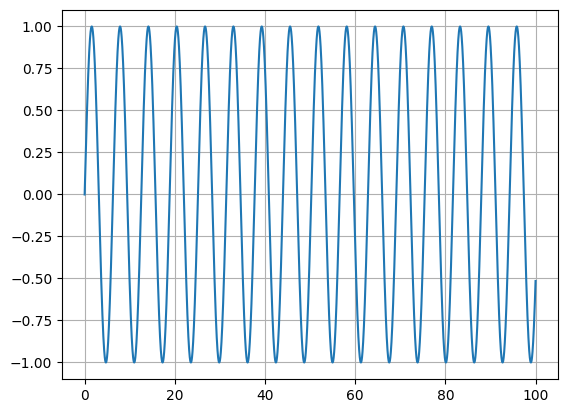

In [215]:
plt.plot(t,x_analytical)

plt.grid()
plt.show()

In [216]:
#Euler Method

x[0] = x0
v[0] = v0

for i in range(1,n):
    x[i] = x[i-1]+v[i-1]*dt
    v[i] = v[i-1] + (-k/m)*x[i-1]*dt

<function matplotlib.pyplot.show(close=None, block=None)>

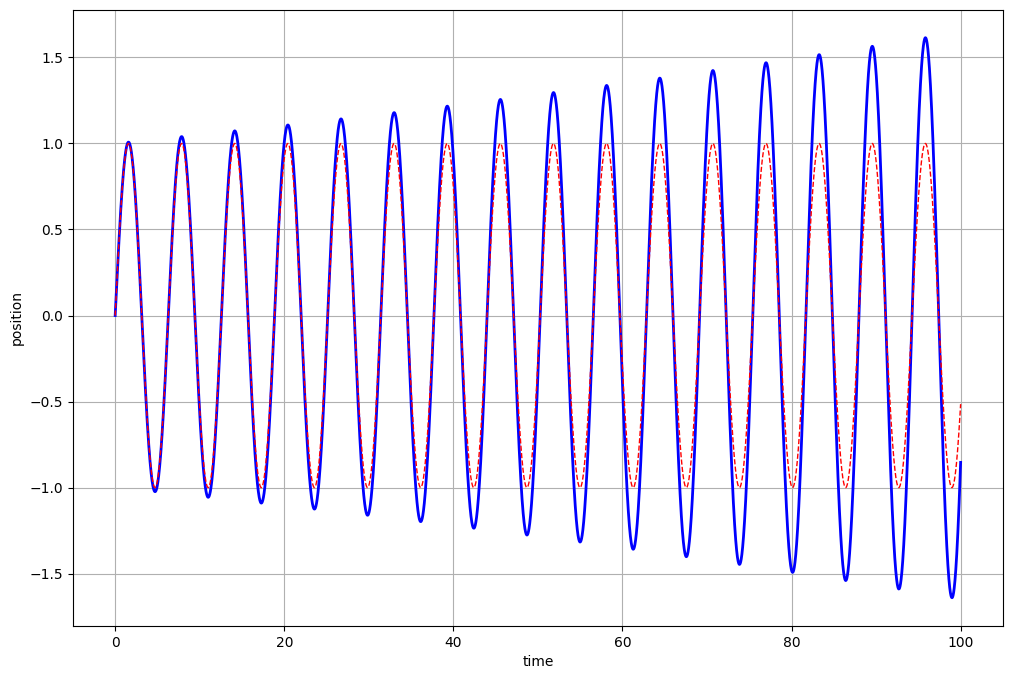

In [217]:
plt.figure(figsize=(12,8))
plt.plot(t,x,lw =2,ls='-',color = 'b')
plt.plot(t,x_analytical , lw=1, ls ='--', color = 'r')
plt.xlabel('time')
plt.ylabel('position')
plt.grid(True)
plt.show

In [218]:
error = x_analytical - x

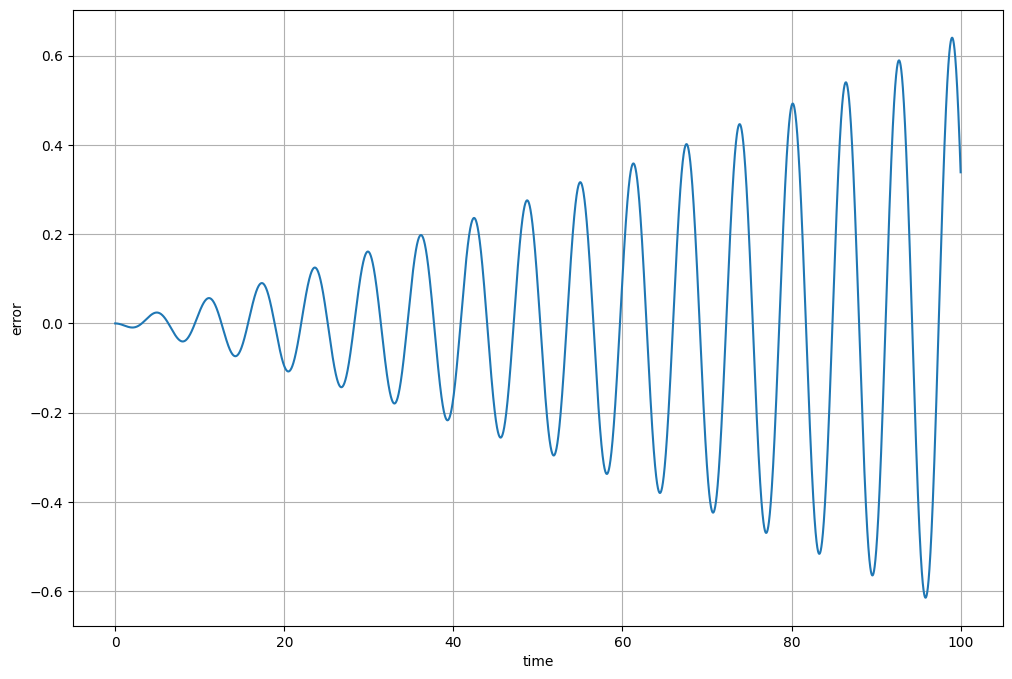

In [219]:

plt.figure(figsize=(12,8))
plt.plot(t,error)
plt.xlabel('time')
plt.ylabel('error')
plt.grid(True)
plt.show()

## Modified Euler

In [220]:
x_me = np.zeros(n,dtype=float)
v_me = np.zeros(n,dtype=float)

x_me[0]= x0
v_me[0] = v0

In [221]:
for i in range(1,n):
    v_me[i] = v_me[i-1] + (-k/m)*x_me[i-1]*dt
    x_me[i] = x_me[i-1] + v_me[i]*dt

<function matplotlib.pyplot.show(close=None, block=None)>

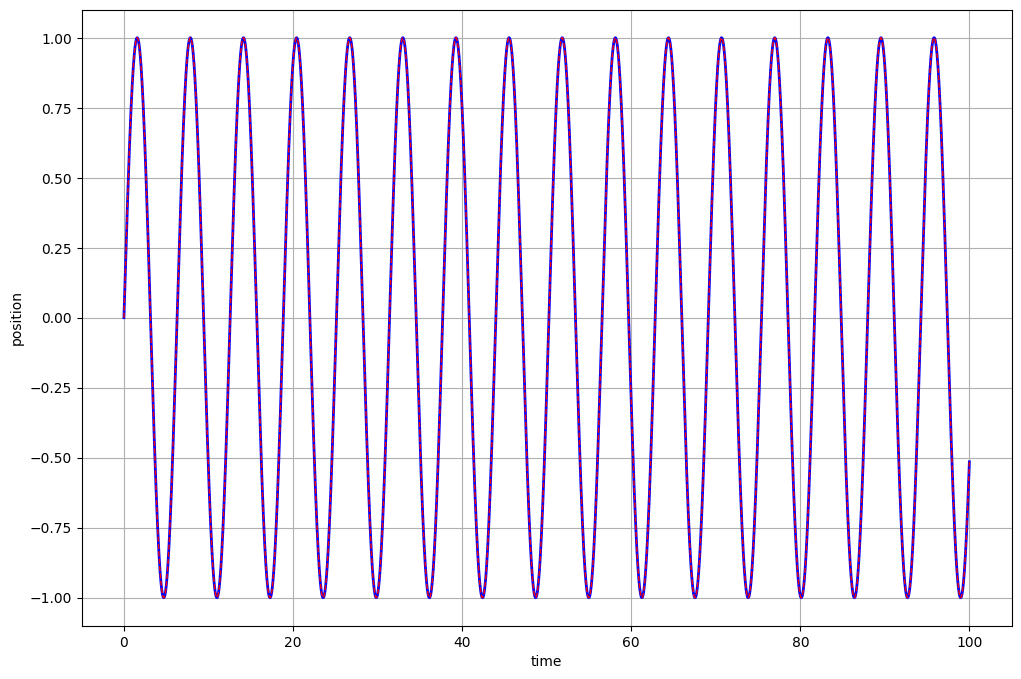

In [222]:
plt.figure(figsize=(12,8))
plt.plot(t,x_me,lw =2,ls='-',color = 'b')
plt.plot(t,x_analytical , lw=1, ls ='--', color = 'r')
plt.xlabel('time')
plt.ylabel('position')
plt.grid(True)
plt.show

In [223]:
error2 = x_analytical - x_me

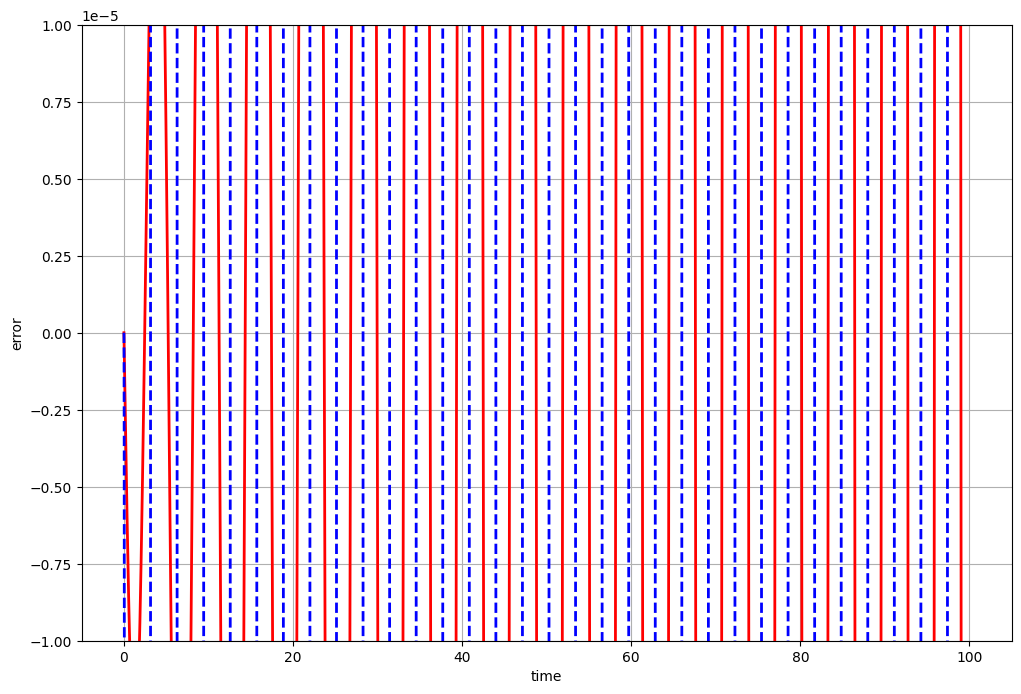

In [224]:

plt.figure(figsize=(12,8))
plt.plot(t,error2,ls = '-',lw=2,color = 'r')
plt.plot(t,error,ls = '--',lw=2,color = 'b')
plt.xlabel('time')
plt.ylabel('error')

plt.ylim([-0.00001,0.00001])
plt.grid(True)
plt.show()

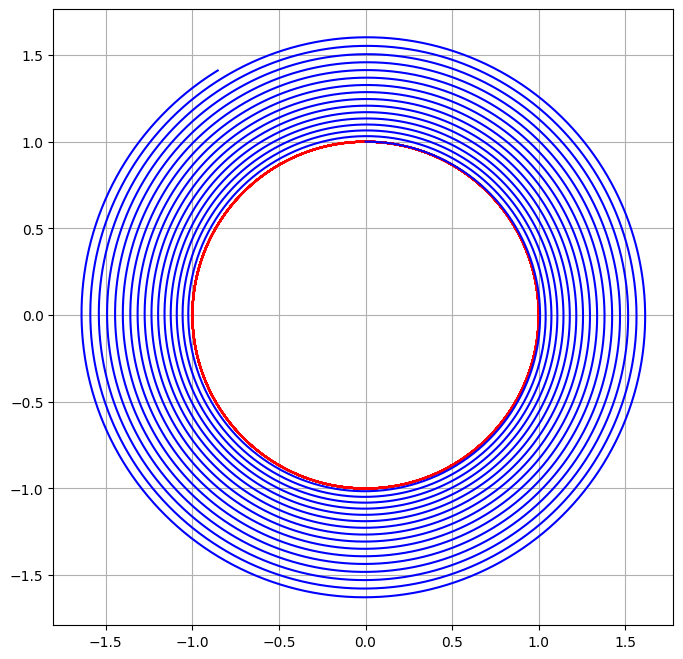

In [225]:
plt.figure(figsize=(8,8))
plt.plot(x_analytical,m*v_analytical,color = 'r',ls= '--')
plt.plot(x,m*v,color = 'b',ls = '-')

plt.grid()
plt.show()

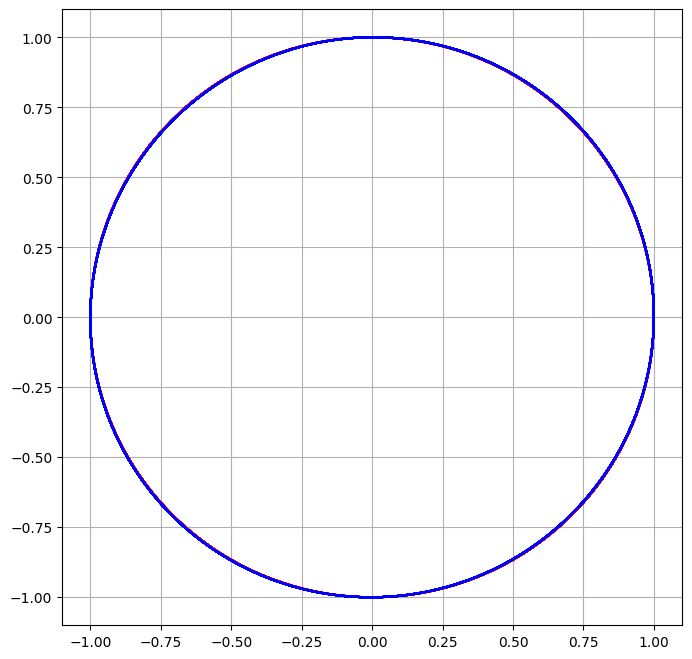

In [226]:
plt.figure(figsize=(8,8))
plt.plot(x_analytical,m*v_analytical,color = 'r',ls= '--')
plt.plot(x_me,m*v_me,color = 'b',ls = '-')

plt.grid()
plt.show()

In [227]:
pot_E = 0.5*k*x**2
kin_E = 0.5*m*v**2
tot_E = pot_E+kin_E

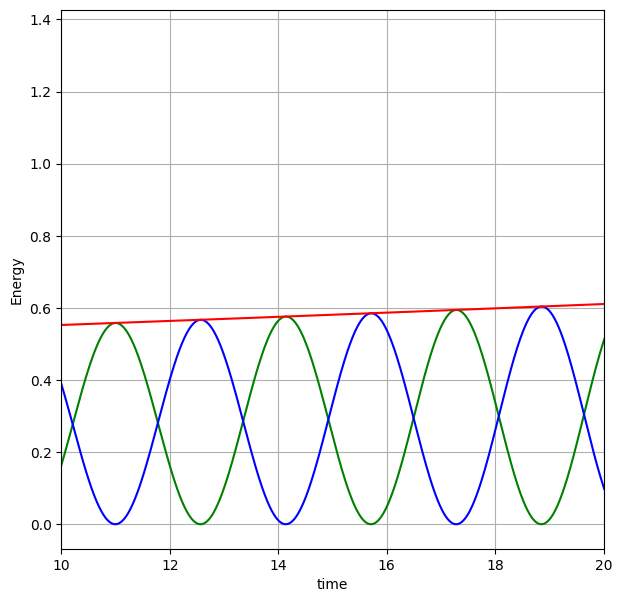

In [228]:
plt.figure(figsize=(7,7))
plt.plot(t,pot_E,color = 'g')
plt.plot(t,kin_E,color = 'b')
plt.plot(t,tot_E,color = 'r')

plt.xlabel('time')
plt.ylabel('Energy')
plt.xlim([10,20])
plt.grid()
plt.show()

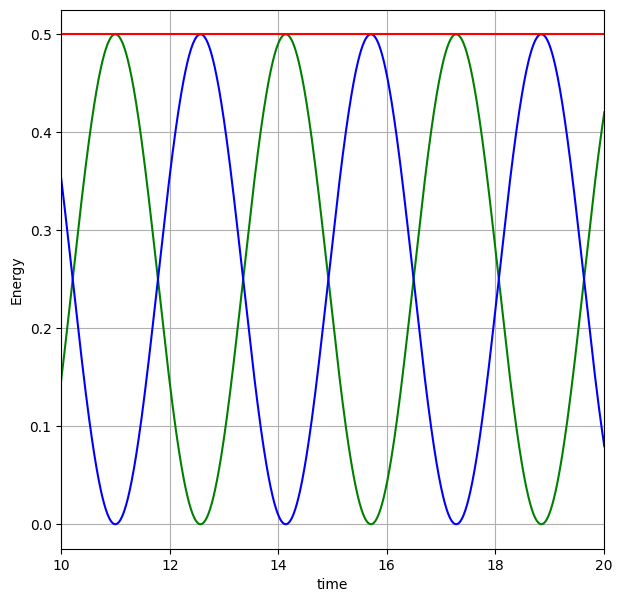

In [243]:
#analytical energy
pot_E_Analytical = (k*x_analytical**2)/2
kin_E_Analytical = (m*v_analytical**2)/2
tot_E_Analytical = pot_E_Analytical+kin_E_Analytical

plt.figure(figsize=(7,7))
plt.plot(t,pot_E_Analytical,color = 'g')
plt.plot(t,kin_E_Analytical,color = 'b')
plt.plot(t,tot_E_Analytical,color = 'r')
plt.xlabel('time')
plt.ylabel('Energy')
plt.xlim([10,20])
plt.grid()
plt.show()


## Verlet Algo

In [229]:
x_va = np.zeros(n+1,dtype=float)
v_va = np.zeros(n,dtype=float)
x_va[0] = x0
v_va[0] = v0
x_va[1] = v_va[0]*dt

In [230]:
for i in range(2,n+1):
    x_va[i] = x_va[i-1]*(2 - ((k/m)*dt*dt)) - x_va[i-2]
    v_va[i-1] = (x_va[i] - x_va[i-2])/(2*dt)


In [231]:
v_va

array([1.        , 0.99995   , 0.9998    , ..., 0.8469637 , 0.85223779,
       0.85742666], shape=(10000,))

In [232]:
x_va = x_va[:-1]
x_va

array([ 0.        ,  0.01      ,  0.019999  , ..., -0.53165737,
       -0.52316115, -0.51461262], shape=(10000,))

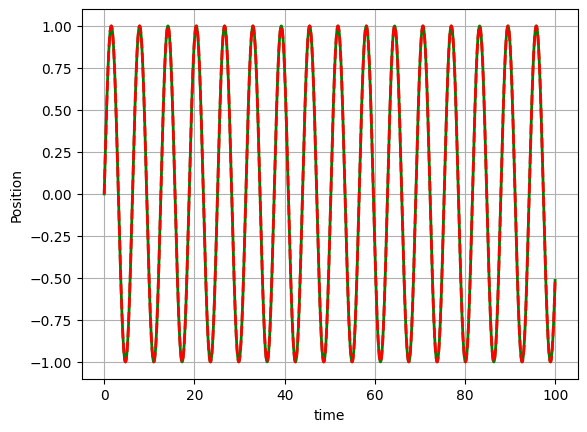

In [233]:
plt.Figure(figsize=(8,8))
plt.plot(t,x_va,ls = '-', lw = 2 , color = 'g')
plt.plot(t,x_analytical,ls = '--', lw = 2 , color = 'r')
plt.grid()
plt.xlabel('time')
plt.ylabel('Position')
plt.show()

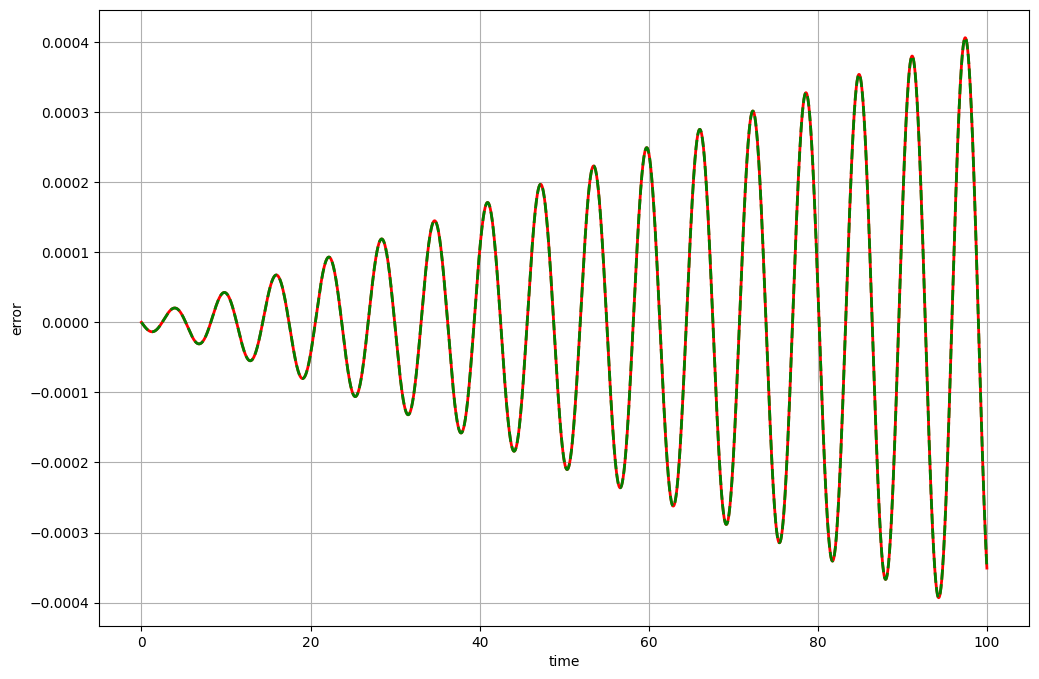

In [234]:
error3 =  x_analytical - x_va
plt.figure(figsize=(12,8))
plt.plot(t,error3,ls = '-',lw=2,color = 'r')
plt.plot(t,error2,ls = '--',lw=2,color = 'g')
# plt.plot(t,error,ls = '--',lw=2,color = 'b')
plt.xlabel('time')
plt.ylabel('error')

# plt.ylim([-0.00001,0.00001])
plt.grid(True)
plt.show()

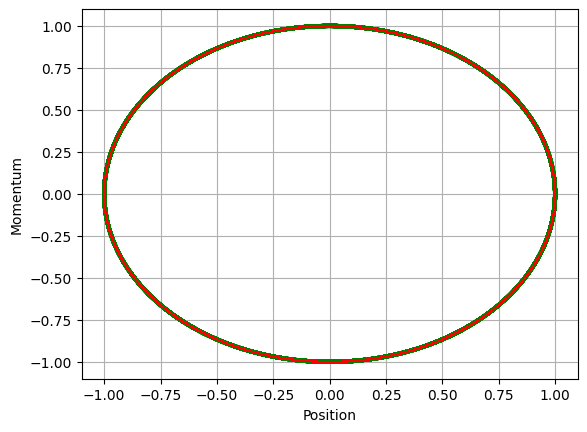

In [235]:
plt.Figure(figsize=(20,20))
plt.plot(x_va,m*v_va,ls = '-', lw = 3 , color = 'g')
plt.plot(x_analytical,m*v_analytical,ls = '--', lw = 1 , color = 'r')
plt.grid()
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.show()

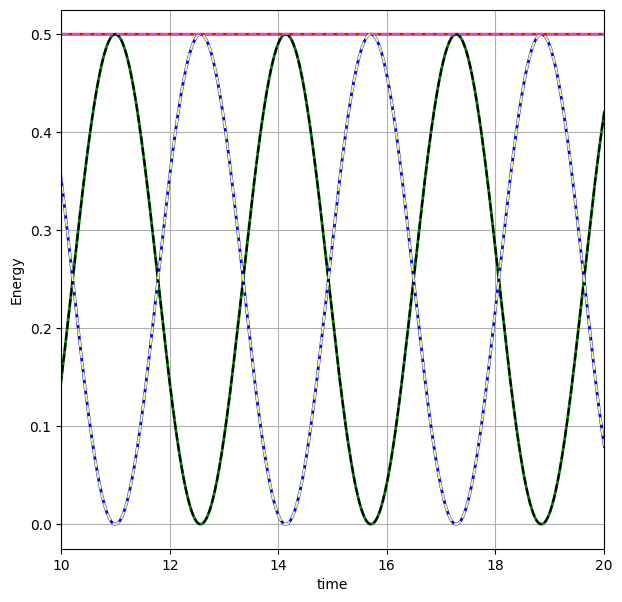

In [258]:
pot_E = 0.5*k*x_va**2
kin_E = 0.5*m*v_va**2
tot_E = pot_E+kin_E
plt.figure(figsize=(7,7))
plt.plot(t,pot_E,color = 'g',lw = 2)
plt.plot(t,kin_E,color = 'b',lw = 2)
plt.plot(t,tot_E,color = 'r',lw = 2)
plt.plot(t,pot_E_Analytical,color = '#000000',ls = '--' , lw= 1.5)
plt.plot(t,kin_E_Analytical,color = '#EDFA82',ls = '--' , lw= 1.5)
plt.plot(t,tot_E_Analytical,color = '#Bc57DE',ls = '--' , lw= 1.5)
plt.xlabel('time')
plt.ylabel('Energy')
plt.xlim([10,20])
plt.grid()
plt.show()

## Error matrix

In [237]:
Error_M =np.array([[1,dt],[-(k/m)*dt,1]])
Error_M

array([[ 1.  ,  0.01],
       [-0.01,  1.  ]])

In [238]:
eig_val, eig_vec = np.linalg.eig(Error_M)

In [239]:
eig_val

array([1.+0.01j, 1.-0.01j])